# **Project- Air Pollution Prediction Model**

In [1]:
#Importing relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Data Preprocessing

In [2]:
data = pd.read_csv("air_pollution_data.csv")

In [3]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
data.shape

(43824, 13)

In [5]:
data.info() #checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [6]:
data.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [7]:
data['pm2.5'].fillna(data['pm2.5'].mean(),inplace=True)

In [8]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.000000,-22,-4.0,1034.0,NW,246.72,0,0


In [9]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0


In [10]:
data.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [11]:
data.keys()

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [12]:
data['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [14]:
data['cbwd']=labelencoder.fit_transform(data['cbwd'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   43824 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  int32  
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int32(1), int64(8)
memory usage: 4.2 MB


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['pm2.5'] = scaler.fit_transform(data[['pm2.5']])
data['Iws'] = scaler.fit_transform(data[['Iws']])

# 2. EDA

In [17]:
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,0.099208,1.817246,12.448521,1016.447654,1.663267,0.040057,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,0.090396,14.433440,12.198613,10.268698,0.937981,0.085466,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.000000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,0.031187,-10.000000,2.000000,1008.000000,1.000000,0.002290,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,0.077465,2.000000,14.000000,1016.000000,2.000000,0.008408,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,0.132797,15.000000,23.000000,1025.000000,2.000000,0.036674,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,1.000000,28.000000,42.000000,1046.000000,3.000000,1.000000,27.000000,36.000000


In [18]:
data['datetime'] = pd.to_datetime(data[['year', 'month','day', 'hour']])

## Visualizations

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'PM 2.5')

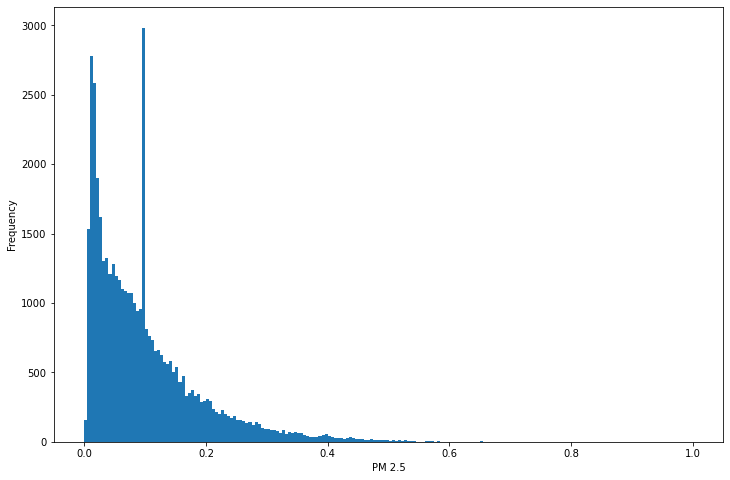

In [20]:
data['pm2.5'].plot.hist(bins = 200, figsize = (12,8))
plt.xlabel('PM 2.5')

<AxesSubplot:xlabel='datetime'>

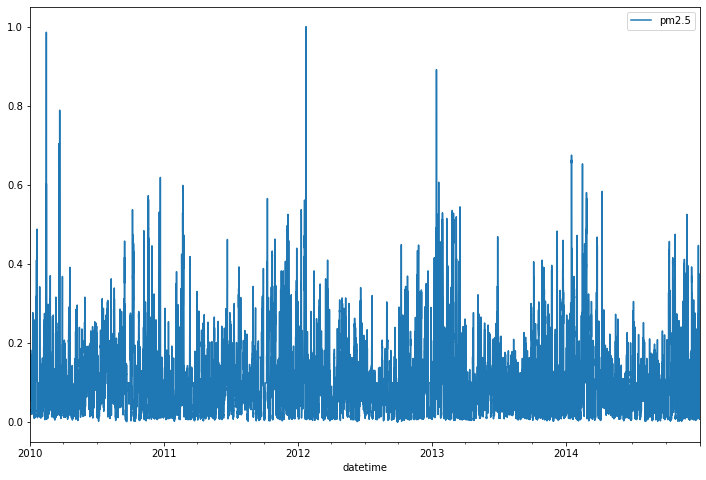

In [21]:
data.plot(x = 'datetime', y = 'pm2.5', figsize = (12,8))

<AxesSubplot:xlabel='year', ylabel='count'>

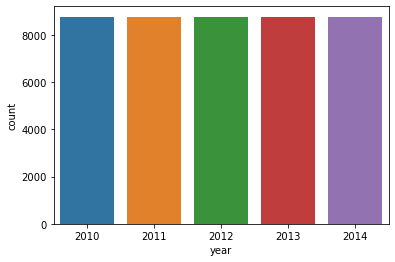

In [22]:
sns.countplot(x=data['year'],data=data)

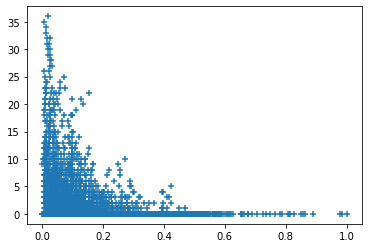

In [23]:
plt.scatter(x=data['pm2.5'],y=data['Ir'],marker='+')

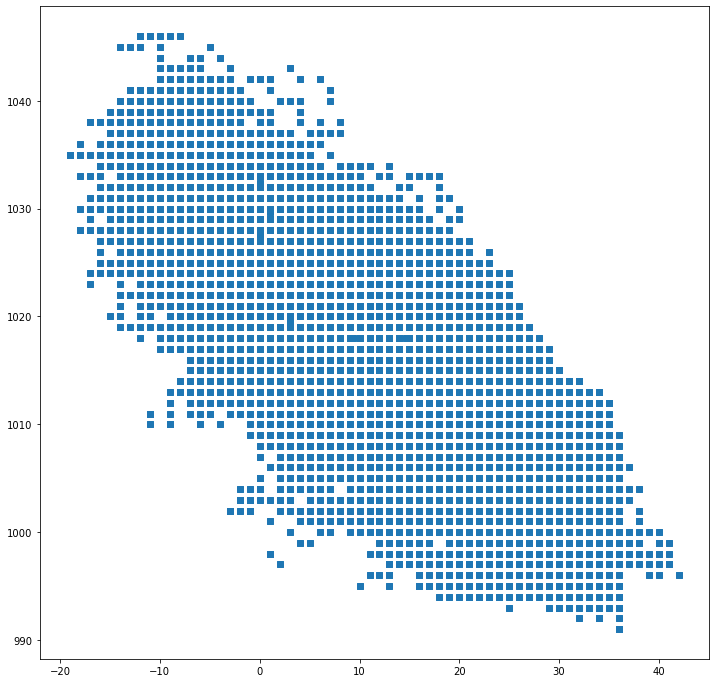

In [24]:
plt.figure(figsize=(12,12))
plt.scatter(x=data['TEMP'],y=data['PRES'],marker='s')

<AxesSubplot:xlabel='cbwd', ylabel='Count'>

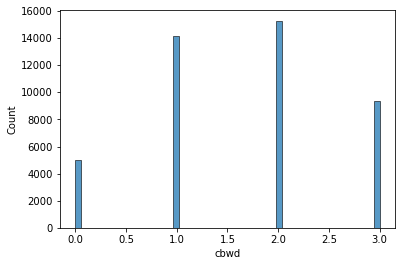

In [25]:
sns.histplot(data=data['cbwd'])

<AxesSubplot:xlabel='TEMP', ylabel='DEWP'>

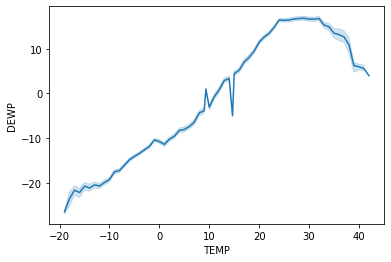

In [26]:
sns.lineplot(x=data['TEMP'],y=data['DEWP'],data=data)

<AxesSubplot:xlabel='year', ylabel='pm2.5'>

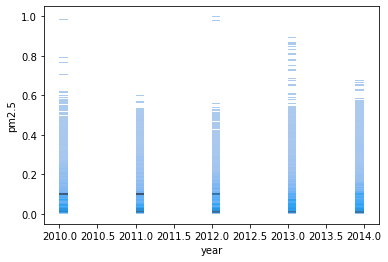

In [27]:
sns.histplot(x=data['year'],y=data['pm2.5'],data=data)

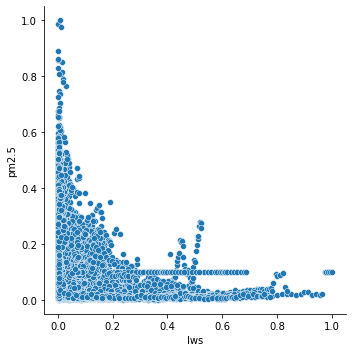

In [28]:
sns.relplot(x=data['Iws'],y=data['pm2.5'])

# 3. Model Implementation

### Importing Libraries for model building

In [29]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [30]:
data = data.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,5]]

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  int32  
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
 12  pm2.5   43824 non-null  float64
dtypes: float64(4), int32(1), int64(8)
memory usage: 4.2 MB


In [32]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 40)
print(x_train.shape)
print(x_test.shape)

(35059, 12)
(8765, 12)


#### Ridge Regressor

In [34]:
rr = Ridge(alpha=0.1, normalize=True)
rr.fit(x_train,y_train)
y_train_predict_rr = rr.predict(x_train)
y_test_predict_rr = rr.predict(x_test)

#### Random Forest Regressor

In [35]:
rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=7,
                            max_features='auto',
                            min_samples_split=7,
                            min_samples_leaf=3)
rfr.fit(x_train,y_train)
y_train_predict_rfr = rfr.predict(x_train)
y_test_predict_rfr = rfr.predict(x_test)

In [36]:
mse = metrics.mean_squared_error(y_test,y_test_predict_rfr)
r2 = metrics.r2_score(y_test,y_test_predict_rfr)

print(np.sqrt(mse))
print(r2)

0.06402996020673546
0.487609337050229


In [37]:
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
          'n_estimators':[100,200,300,400,500]
         }
forest = RandomizedSearchCV(rfr, params, n_jobs=-1,cv=5, verbose=2)
forest.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=7,
                                                   min_samples_leaf=3,
                                                   min_samples_split=7),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [38]:
y_train_predict_rfr_1 = forest.predict(x_train)
y_test_predict_rfr_1 = forest.predict(x_test)


mse = metrics.mean_squared_error(y_test,y_test_predict_rfr_1)
r2 = metrics.r2_score(y_test,y_test_predict_rfr_1)

print(np.sqrt(mse))
print(r2)

0.06769529189575939
0.4272677034551783


# 4. Model Evaluation

### • For Ridge Regressor

In [39]:
print("Ridge Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_rr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_rr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_rr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_rr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_rr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_rr))

Ridge Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 0.057170028179069445
Mean Squared Error         : 0.00636142814750233
Root Mean Squared Error    : 0.07975856159373945
R2 Score                   : 0.22550093208263233

-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.05646316231176229
Mean Squared Error         : 0.006119798313353914
Root Mean Squared Error    : 0.07822913979684241
R2 Score                   : 0.2351577807626567


### • For Random Forest Regressor

In [40]:
print("Random Forest Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_rfr_1))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_rfr_1))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rfr_1)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_rfr_1))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_rfr_1))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_rfr_1))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rfr_1)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_rfr_1))

Random Forest Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 0.04876909684764339
Mean Squared Error         : 0.004604915480446562
Root Mean Squared Error    : 0.0678595275583802
R2 Score                   : 0.4393550214279438

-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.04921801868879994
Mean Squared Error         : 0.004582652544852067
Root Mean Squared Error    : 0.06769529189575939
R2 Score                   : 0.4272677034551783


In [41]:
print("Accuracy on Training set:")
output_train = pd.DataFrame({'Model':['Ridge Regressor','Random Forest Regressor'], 'Accuracy':[metrics.r2_score(y_train,y_train_predict_rr)*100, metrics.r2_score(y_train,y_train_predict_rfr_1)*100]})
output_train

Accuracy on Training set:


,Model,Accuracy
0,Ridge Regressor,22.550093
1,Random Forest Regressor,43.935502


In [42]:
print("Accuracy on Testing set:")
output_test = pd.DataFrame({'Model':['Ridge Regressor','Random Forest Regressor'], 'Accuracy':[metrics.r2_score(y_test,y_test_predict_rr)*100, metrics.r2_score(y_test,y_test_predict_rfr_1)*100]})
output_test

Accuracy on Testing set:


,Model,Accuracy
0,Ridge Regressor,23.515778
1,Random Forest Regressor,42.726770


# 5. Cross Validation and Overfitting Check

## • Overfitting Check

### For Ridge Regressor

In [43]:
# Check the training and validation scores
train_score = rr.score(x_train, y_train)
test_score = rr.score(x_test, y_test)
if train_score > test_score:
    print('Ridge Regressor Model is Overfitted!')
    print('Training score:', train_score)
    print('Testing score:', test_score)
else:
    print('Ridge Regressor Model is not Overfitted.')
    print('Training score:', train_score)
    print('Testing score:', test_score)

Ridge Regressor Model is not Overfitted.
Training score: 0.22550093208263233
Testing score: 0.2351577807626567


### For Random Forest Regressor

In [44]:
# Check the training and validation scores
train_score = rfr.score(x_train, y_train)
test_score = rfr.score(x_test, y_test)
if train_score > test_score:
    print('Random Forest Regressor Model is Overfitted!!')
    print('Training score:', train_score)
    print('Testing score:', test_score)
else:
    print('Random Forest Regressor Model is not Overfitted.')
    print('Training score:', train_score)
    print('Testing score:', test_score)

Random Forest Regressor Model is Overfitted!!
Training score: 0.508674669501447
Testing score: 0.487609337050229


## • 10-fold Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score, KFold
cvs = cross_val_score
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

#### • For Ridge regressor

In [46]:
score_rr = cvs(rr, x_test, y_test, cv=k_folds)
score_rr

array([0.22195775, 0.23183373, 0.22048029, 0.25641299, 0.23362509,
       0.24302769, 0.21680738, 0.23644708, 0.24978931, 0.22352156])

In [47]:
from sklearn import metrics

k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the cross-validation mae scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    rr.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = rr.predict(x_test)
    y_pred_train = rr.predict(x_train)
    
    # Calculate the accuracy score for this fold
    mae_test = metrics.mean_absolute_error(y_pred_test,y_test)
    mae_train = metrics.mean_absolute_error(y_pred_train,y_train)
    
    # Store the mae score
    test_score.append(mae_test)
    train_score.append(mae_train)

# Print the mae scores for each fold
print("Testing MAE Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")
    
print("\nTraining MAE Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")

# Calculate and print the average mae score
average_mae_test = sum(test_score) / len(test_score)
print("\nAverage MAE Testing Score:", average_mae_test)

average_mae_train = sum(train_score) / len(train_score)
print("\nAverage MAE Training Score:", average_mae_train)


Testing MAE Scores for Each Fold:
Fold 1: 0.05708721880593349
Fold 2: 0.05680948537349632
Fold 3: 0.0586683547497965
Fold 4: 0.056814129376709356
Fold 5: 0.05634611745261146
Fold 6: 0.05640012033777014
Fold 7: 0.0564722439039335
Fold 8: 0.05771826456500751
Fold 9: 0.05514302234551695
Fold 10: 0.05857174477995582

Training MAE Scores for Each Fold:
Fold 1: 0.056952955938098244
Fold 2: 0.057033784834376225
Fold 3: 0.05674310672101199
Fold 4: 0.05694481185706586
Fold 5: 0.05708803704538902
Fold 6: 0.05709334042863952
Fold 7: 0.05702564242761217
Fold 8: 0.05691150920129354
Fold 9: 0.05729188973073684
Fold 10: 0.056785573636091144

Average MAE Testing Score: 0.05700307016907311

Average MAE Training Score: 0.05698706518203145


#### • For Random Forest Regressor

In [48]:
score_rfr = cvs(rfr, x_test, y_test, cv=10)
score_rfr

array([0.22478963, 0.34922846, 0.38978428, 0.22502534, 0.24235463,
       0.30256843, 0.32702242, 0.21970055, 0.2418782 , 0.4522722 ])

In [49]:
from sklearn import metrics

k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the cross-validation mae scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    rfr.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = rr.predict(x_test)
    y_pred_train = rr.predict(x_train)
    
    # Calculate the accuracy score for this fold
    mae_test = metrics.mean_absolute_error(y_pred_test,y_test)
    mae_train = metrics.mean_absolute_error(y_pred_train,y_train)
    
    # Store the mae score
    test_score.append(mae_test)
    train_score.append(mae_train)

# Print the mae scores for each fold
print("Testing MAE Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")
    
print("\nTraining MAE Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")

# Calculate and print the average mae score
average_mae_test = sum(test_score) / len(test_score)
print("\nAverage MAE Testing Score:", average_mae_test)

average_mae_train = sum(train_score) / len(train_score)
print("\nAverage MAE Training Score:", average_mae_train)


Testing MAE Scores for Each Fold:
Fold 1: 0.05708155006014328
Fold 2: 0.05673774421371705
Fold 3: 0.058684654006823586
Fold 4: 0.05680854616005098
Fold 5: 0.05628329766886995
Fold 6: 0.05633365239638322
Fold 7: 0.05645729842637351
Fold 8: 0.05767913947832329
Fold 9: 0.05500378506085001
Fold 10: 0.05857174477995582

Training MAE Scores for Each Fold:
Fold 1: 0.05695113072860387
Fold 2: 0.056989337189517285
Fold 3: 0.05677298097078079
Fold 4: 0.05698146910983417
Fold 5: 0.05703981975040528
Fold 6: 0.05703422534809395
Fold 7: 0.0570204882935983
Fold 8: 0.056884741944791345
Fold 9: 0.057181973400026065
Fold 10: 0.056785573636091144

Average MAE Testing Score: 0.056964141225149076

Average MAE Training Score: 0.05696417403717422


# Distribution Plot

In [50]:
# Function for plotting
def DistributionPlot(actual, predict, actualName, predictName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(actual, hist=False, color="r", label=actualName)
    ax2 = sns.distplot(predict, hist=False, color="b", label=predictName, ax=ax1)
    plt.title(Title)
    plt.legend()
    plt.show()
    plt.close()

## For Ridge Regressor

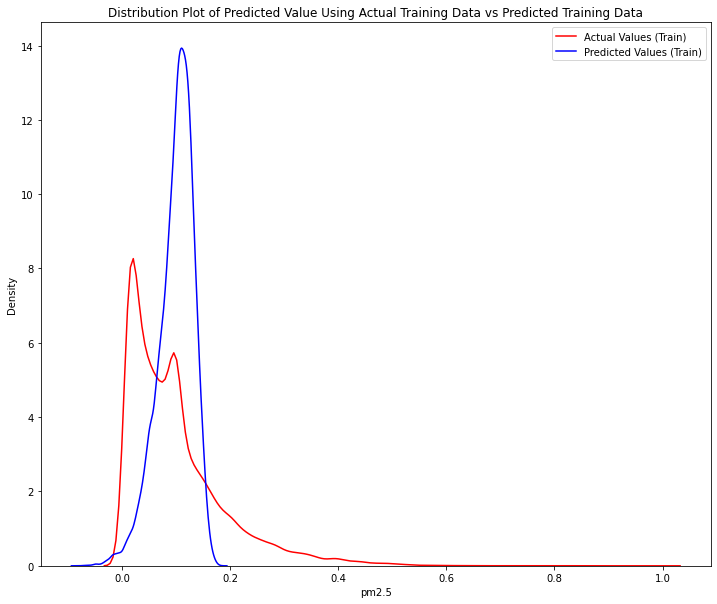

In [51]:
Title = 'Distribution Plot of Predicted Value Using Actual Training Data vs Predicted Training Data'
DistributionPlot(y_train,y_train_predict_rr,"Actual Values (Train)","Predicted Values (Train)",Title)

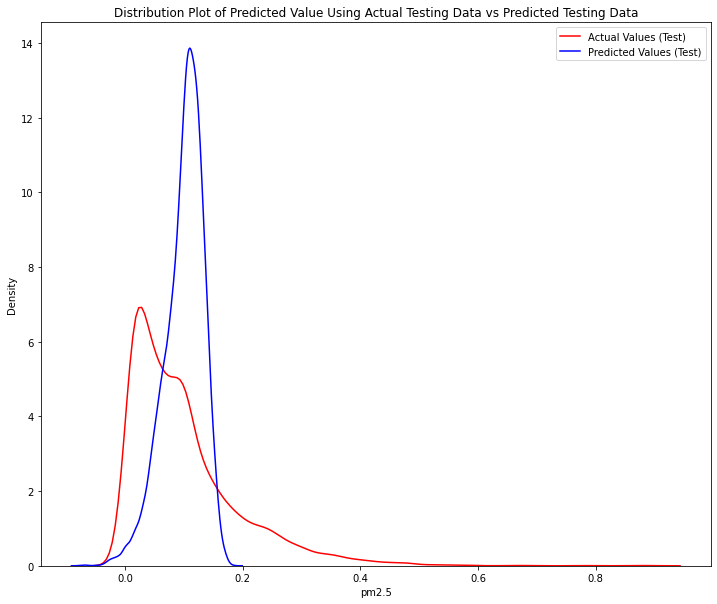

In [52]:
Title = 'Distribution Plot of Predicted Value Using Actual Testing Data vs Predicted Testing Data'
DistributionPlot(y_test,y_test_predict_rr,"Actual Values (Test)","Predicted Values (Test)",Title)

## For Random Forest Regressor

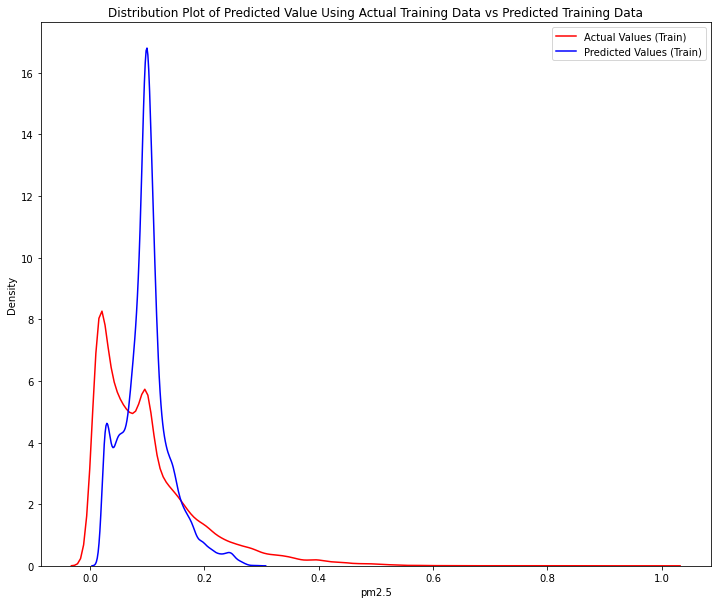

In [53]:
Title = 'Distribution Plot of Predicted Value Using Actual Training Data vs Predicted Training Data'
DistributionPlot(y_train,y_train_predict_rfr_1,"Actual Values (Train)","Predicted Values (Train)",Title)

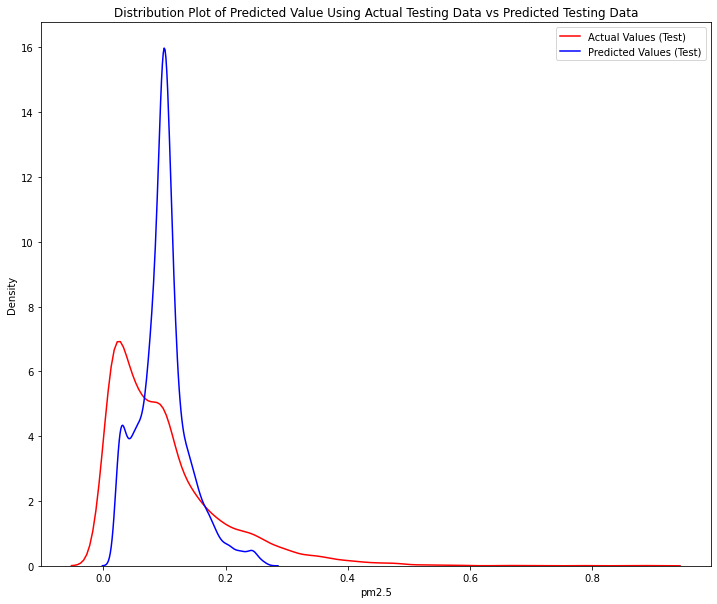

In [54]:
Title = 'Distribution Plot of Predicted Value Using Actual Testing Data vs Predicted Testing Data'
DistributionPlot(y_test,y_test_predict_rfr_1,"Actual Values (Test)","Predicted Values (Test)",Title)